###Lukas Mosser

##Derivation of solution for a horizontal well from greens functions

$$I(y)=\frac{1}{2\sqrt{\pi \eta_{y} t}}exp(-\frac{(y-y_{w})^2}{4\eta_{y}t})$$

$$II(x)=\frac{1}{2}[erf\frac{\frac{x_{f}}{2}+(x-x_{w})}{2\sqrt{\eta_{x} t}}+erf\frac{\frac{x_{f}}{2}-(x-x_{w})}{2\sqrt{\eta_{x} t}}]$$

$$VII(z)=\frac{1}{z_{e}}[1+2\sum_{n=1}^{\infty}exp(-\frac{n^2\pi^2\eta_{z}t}{z_{e}^2})cos(n\pi\frac{z_{w}}{z_{e}})cos(n\pi\frac{z}{z_{e}})]$$

$$S(x,y,z,t)=II(x)I(y)VII(z)$$
$$S(x,y,z,t)=\frac{1}{2}[erf\frac{\frac{x_{f}}{2}+(x-x_{w})}{2\sqrt{\eta_{x} t}}+erf\frac{\frac{x_{f}}{2}-(x-x_{w})}{2\sqrt{\eta_{x} t}}]* \\ \frac{1}{2\sqrt{\pi \eta_{y} t}}exp(-\frac{(y-y_{w})^2}{4\eta_{y}t})*\\ \frac{1}{z_{e}}[1+2\sum_{n=1}^{\infty}exp(-\frac{n^2\pi^2\eta_{z}t}{z_{e}^2})cos(n\pi\frac{z_{w}}{z_{e}})cos(n\pi\frac{z}{z_{e}})]$$

$$\Delta P(M, t) = \frac{1}{\phi c_{t}}\int_0^t q(\tau)\left \{\frac{1}{2}[erf\frac{\frac{x_{f}}{2}+(x-x_{w})}{2\sqrt{\eta_{x} t}}+erf\frac{\frac{x_{f}}{2}-(x-x_{w})}{2\sqrt{\eta_{x} t}}]* \\ \frac{1}{2\sqrt{\pi \eta_{y} t}}exp(-\frac{(y-y_{w})^2}{4\eta_{y}t})*\\ \frac{1}{z_{e}}[1+2\sum_{n=1}^{\infty}exp(-\frac{n^2\pi^2\eta_{z}t}{z_{e}^2})cos(n\pi\frac{z_{w}}{z_{e}})cos(n\pi\frac{z}{z_{e}})]\right \} d\tau$$

$$x_{D} = \frac{x}{x_{e}}, \ y_{D} = \frac{y}{y_{e}}, \ z_{D} = \frac{z}{z_{e}}$$
$$z_{e}=h, \ z_{w} = \frac{1}{2}h, \ x_{w}=y_{w}=0, \ x_{f}=L=10h, \ \frac{k_{x,y}}{k_{z}} = 10$$

$$x=y=0, \ z=r_{w}$$

We arrive at the final expression for the dimensionless pressure of a horizontal well in an infinite reservoir with out wellbore storage and skin:
$$P_{D}(z_{D}, t_{D}) = \sqrt{\pi}\int_0^{t_{DA}}\frac{1}{\sqrt{\tau_{DA}}}\left \{[erf\frac{1}{4\sqrt{\tau_{DA}}}][1+2\sum_{n=1}^{\infty}exp(-n^2\pi^2 10^2\sqrt{\frac{k_{z}}{k_{r}}}\tau_{DA})cos(\frac{\pi n}{2})cos(n\pi z_{D})]\right \} d\tau$$

In [1]:
from scipy.integrate import trapz, quad, cumtrapz
from scipy.special import erf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
def inf_sum_term(n, tau_da, z_D):
    return np.exp(-1*n**2*np.pi**2*(10)**2*np.sqrt(0.1)*tau_da)*np.cos(np.pi/2.*n)

def inf_sum(N, tau_da, z_D):
    a = 0.
    for n in range(1, N+1):
        a += inf_sum_term(n, tau_da, z_D)
    return a   
        
def inf_sum_error(e, tau_da, z_D):
    return inf_sum(1000, tau_da, z_D)  
    
def source_function(x):
    a = 1./np.sqrt(x)
    b = erf(0.25*1./np.sqrt(x))
    s = inf_sum_error(1e-4, x, 0.)
    c = (1.+2.*s)
    return np.sqrt(np.pi)*a*b*c

def P_D(t_Ds):
    source_function_vals = [source_function(t_DA) for t_DA in tDs]
    y_int = cumtrapz(source_function_vals, tDs, initial=tDs[0])#, initial=source_function(tDs[0]))
    return y_int, source_function_vals

In [3]:
exponents = [-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]
lowers = np.linspace(1, 9, 100)
tDs = []
for exponent in exponents:
    for lower in lowers:
        tDs.append(float(str(lower)+'e'+str(exponent)))

p, source = P_D(tDs)

In [4]:
actual_data = pd.read_excel("solution_ex8.xlsx", sheetname="Sheet1", header=0, skiprows=1)

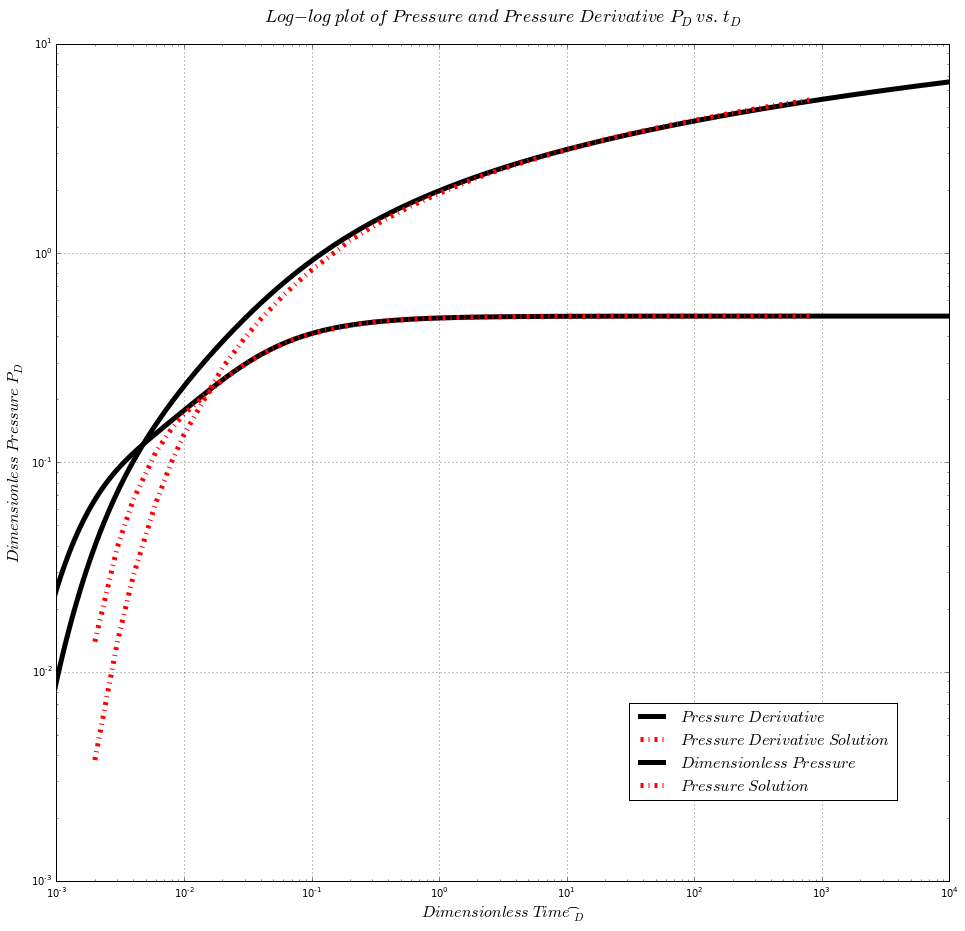

In [5]:
fig, ax = plt.subplots(figsize=(16,15))

ax.set_xscale('log', basex=10)
ax.set_yscale('log', basey=10)
ax.set_xlim(left=1e-3,right=1.0e4)
ax.set_ylim(bottom=1e-3, top=1e1)

ax.set_title(r'$Log-log \ plot \ of \ Pressure \ and \ Pressure \ Derivative \ P_{D} \ vs. \ t_{D}}$', fontsize=18, y=1.02)

ax.set_xlabel(r'$Dimensionless \ Time \ \t_{D}$', fontsize=16)
ax.set_ylabel(r'$Dimensionless \ Pressure \ P_{D}$', fontsize=16)

ax.plot(tDs, np.multiply(tDs, source), color="black", linestyle='-', label='$Pressure \ Derivative$', linewidth=5)
ax.plot(actual_data.ix[:,0], actual_data.ix[:,2], color="red", linestyle='-.', label='$Pressure \ Derivative \ Solution$', linewidth=5)

ax.plot(tDs,  p, color="black", linestyle='-', label='$Dimensionless \ Pressure $', linewidth=5)
ax.plot(actual_data.ix[:,0], actual_data.ix[:,1], color="red", linestyle='-.', label='$Pressure \ Solution$', linewidth=5)


plt.grid()
legend = plt.legend(bbox_to_anchor=(0., 0.12, 0.95, .102), fontsize=16)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.show()